## A short notebook that generalizes the results about chords on a circle to chords on an ellipse. For the implementation and idea, I followed the approach outlined in "Products of Chord Lengths of an Ellipse" by Thomas Price and "Products of Elliptical Chord Lengths and the Fibonacci Numbers" by Thomas Price.

In [3]:
from complex import *
import matplotlib.pyplot as plt
from math import sqrt
from operator import mul
from functools import reduce
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from matplotlib.patches import Ellipse
% matplotlib inline

In [35]:
def dist(a, b):
    
    return sqrt((a[0] - b[0])**2 + (a[1] - b[1]) ** 2)

def plot_ellipse(a, b):
    """
    plot ellipse centered at 0 
    :param a: 
    :param b: 
    :return: 
    """
    # width
    maj_ax_verts = [(a + b, 0), (-1*(a + b),0)]
    
    # height
    min_ax_verts = [(0, a - b), (0, -1*(a - b))]
    
    width = dist(maj_ax_verts[0], maj_ax_verts[1])
    height = dist(min_ax_verts[0], min_ax_verts[1])
    
    fig = plt.figure(figsize=(10,10))
    

    ax = fig.add_subplot(111, aspect='equal')
    ax.set_facecolor('xkcd:light gray')
    
    ell = Ellipse(xy=(0,0), width=width, height=height, edgecolor='black', facecolor='none')
    ell.set_clip_box(ax.bbox)
    ax.add_patch(ell)
    ax.autoscale()
    
    
    
    return ax

## If we set b = 0 then we have a circle of radius a. We can generalize the equation from before to say that the product the lengths of the chords should be $na^{n-1}$

In [66]:
def transform_roots(roots, a, b):
    
    transformed = []
    for root in roots:
        
        new = a * e(Complex(0, root[1])) + b * e(Complex(0, -1*root[1]))
        
        transformed.append(new)
    
    return transformed

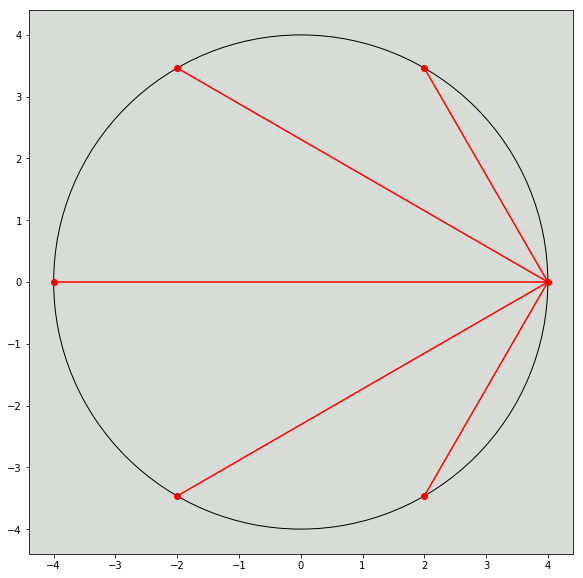

In [69]:
ax = plot_ellipse(4,0)

r = roots(6, Complex(1))

transformed = transform_roots(r, 4, 0)

for root in transformed:
    ax.plot(root.re, root.im, 'ro')

base = transformed[0]
lengths = []
for root in transformed[1:]:
    ax.plot([base.re, root.re], [base.im, root.im],'r')
    
    length = dist((base.re, base.im), (root.re, root.im))
    lengths.append(length)
    
    
plt.show()

In [76]:
from operator import mul
from functools import reduce
from math import isclose
prod = reduce(mul, lengths)

In [77]:
def chord_prod(n,a):
    
    return n * (a ** (n-1))

In [78]:
isclose(prod, chord_prod(6, 4))

True

## Now we move to the more general ellipse case

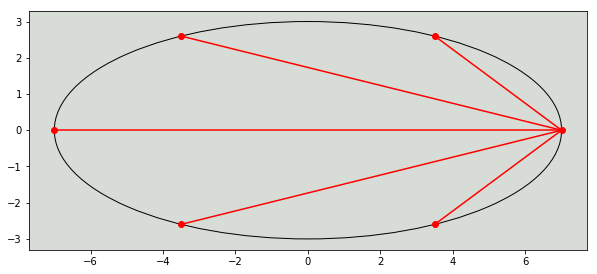

In [80]:
ax = plot_ellipse(2,5)

r = roots(6, Complex(1))

transformed = transform_roots(r, 2, 5)

for root in transformed:
    ax.plot(root.re, root.im, 'ro')

base = transformed[0]
lengths = []
for root in transformed[1:]:
    ax.plot([base.re, root.re], [base.im, root.im],'r')
    
    length = dist((base.re, base.im), (root.re, root.im))
    lengths.append(length)
    
    
plt.show()

In [81]:
prod = reduce(mul, lengths)

In [82]:
def d_n(a,b,n):
    
    return n * ((a ** n - b ** n)/ (a - b))

In [83]:
isclose(prod, d_n(2,5,6))

True

### The last thing to do is to look at a special case.

In [108]:
def ellipse_chords(a, b, n, plot = True):
    
    r = roots(n, Complex(1))
    
    transformed = transform_roots(r, a, b)
    
    if plot:
        ax = plot_ellipse(a, b)
    
        for root in transformed:
            ax.plot(root.re, root.im, 'ro')
    
    base = transformed[0]
    lengths = []
    for root in transformed[1:]:
        if plot:
            ax.plot([base.re, root.re], [base.im, root.im],'r')
        
        length = dist((base.re, base.im), (root.re, root.im))
        lengths.append(length)
    
    
    if plot:
        plt.show()
    
    prod = reduce(mul, lengths)

    return prod

In [115]:
a = (1 + sqrt(5)) / 2
b = (1 - sqrt(5)) / 2

In [104]:
def fib(n):
    """
    calculates the nth fibonnaci number
    :param n: 
    :return: 
    """
    m = [0, 1]
    
    for i in range(2, n + 1):
        m.append(m[i - 1] + m[i - 2])
        
    return m[n]

In [123]:
print("Values for the ellipse chord products for n chords alongside n * the nth fibonacci number")

for i in range(2, 20):
    
    prod = ellipse_chords(a, b, i, False)
    f_n = fib(i)
    
    
    s = 'n = {}, chord product = {:.3f}, n * F(n) = {} * {} = {}'.format(i, prod, i, f_n, i * f_n)
    
    print(s)

Values for the ellipse chord products for n chords alongside n * the nth fibonacci number
n = 2, chord product = 2.000, n * F(n) = 2 * 1 = 2
n = 3, chord product = 6.000, n * F(n) = 3 * 2 = 6
n = 4, chord product = 12.000, n * F(n) = 4 * 3 = 12
n = 5, chord product = 25.000, n * F(n) = 5 * 5 = 25
n = 6, chord product = 48.000, n * F(n) = 6 * 8 = 48
n = 7, chord product = 91.000, n * F(n) = 7 * 13 = 91
n = 8, chord product = 168.000, n * F(n) = 8 * 21 = 168
n = 9, chord product = 306.000, n * F(n) = 9 * 34 = 306
n = 10, chord product = 550.000, n * F(n) = 10 * 55 = 550
n = 11, chord product = 979.000, n * F(n) = 11 * 89 = 979
n = 12, chord product = 1728.000, n * F(n) = 12 * 144 = 1728
n = 13, chord product = 3029.000, n * F(n) = 13 * 233 = 3029
n = 14, chord product = 5278.000, n * F(n) = 14 * 377 = 5278
n = 15, chord product = 9150.000, n * F(n) = 15 * 610 = 9150
n = 16, chord product = 15792.000, n * F(n) = 16 * 987 = 15792
n = 17, chord product = 27149.000, n * F(n) = 17 * 1597 = 27